# **Bharat Intern - Machine Learning Internship**

# **TASK 1 - House Price Prediction**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

### Problem Statement: Machine Learning model to predict house price using linear regression only notebook code.

### Dataset link :- https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit?usp=sharing&ouid=115253717745408081083&rtpof=true&sd=true

### Importing the neccesary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Loading the dataset and getting info about it

In [ ]:
data = pd.read_csv('HousePricePrediction.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
data.shape

(2919, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


### Evaluating for Missing data and null values

In [ ]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

We can see that there are some null values in the data

In [ ]:
data.drop(['Id'],axis=1,inplace=True)

In [ ]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [ ]:
new_data = data.dropna()

In [ ]:
new_data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   MSZoning      2913 non-null   object 
 2   LotArea       2913 non-null   int64  
 3   LotConfig     2913 non-null   object 
 4   BldgType      2913 non-null   object 
 5   OverallCond   2913 non-null   int64  
 6   YearBuilt     2913 non-null   int64  
 7   YearRemodAdd  2913 non-null   int64  
 8   Exterior1st   2913 non-null   object 
 9   BsmtFinSF2    2913 non-null   float64
 10  TotalBsmtSF   2913 non-null   float64
 11  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 295.9+ KB


Now our data don't have any null values

### Data Visualization

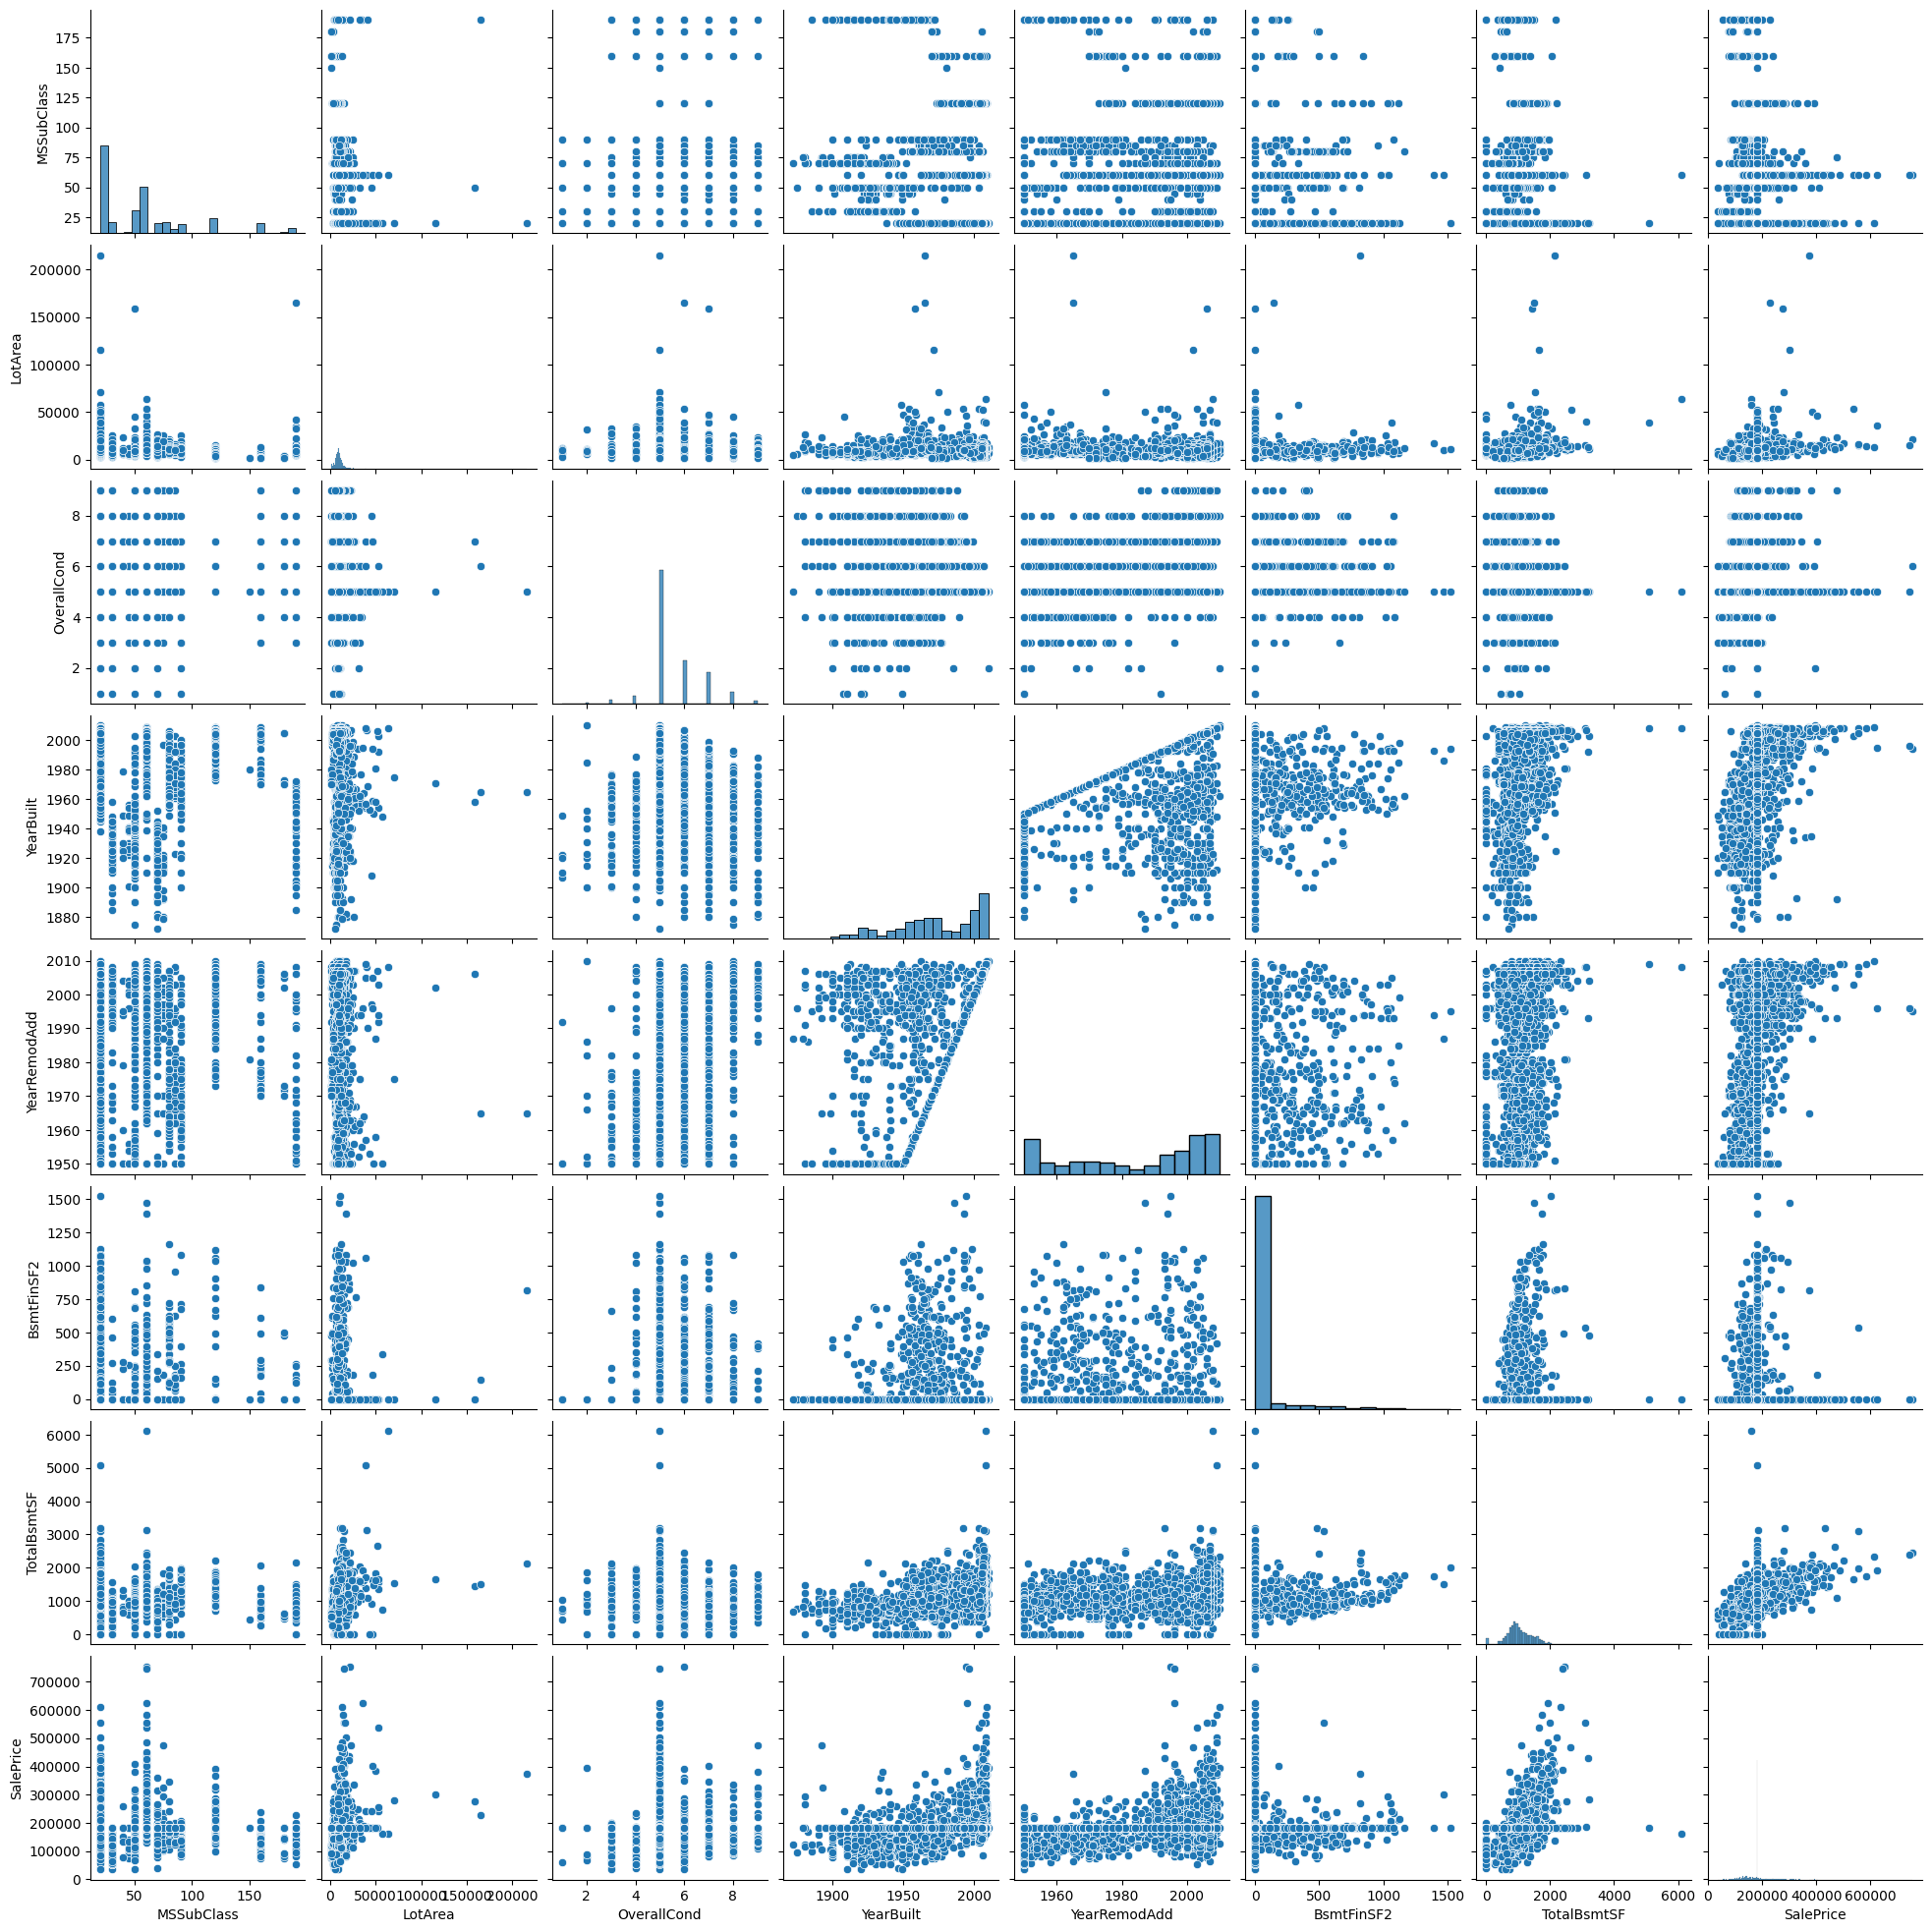

In [ ]:
sns.pairplot(new_data)

<ipython-input-14-43cc015d8253>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)


<Axes: >

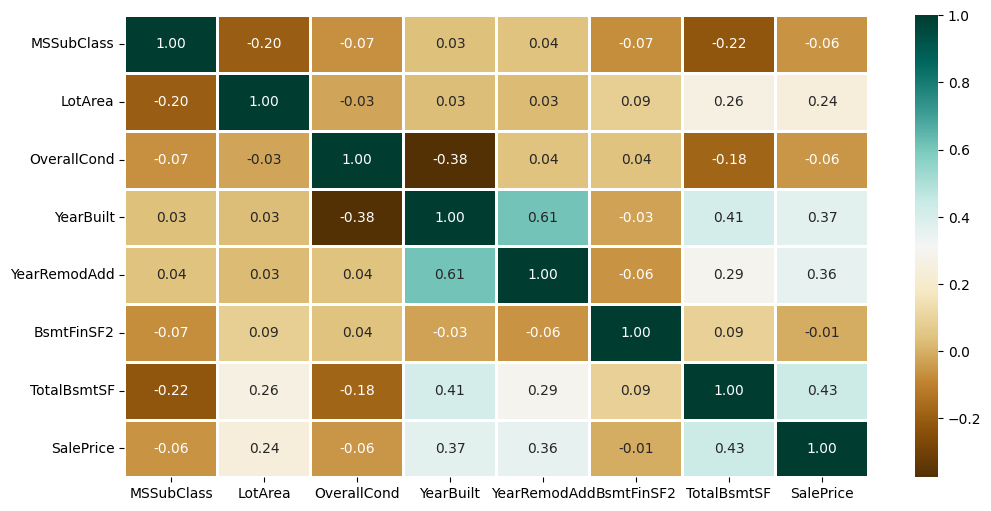

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(new_data.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

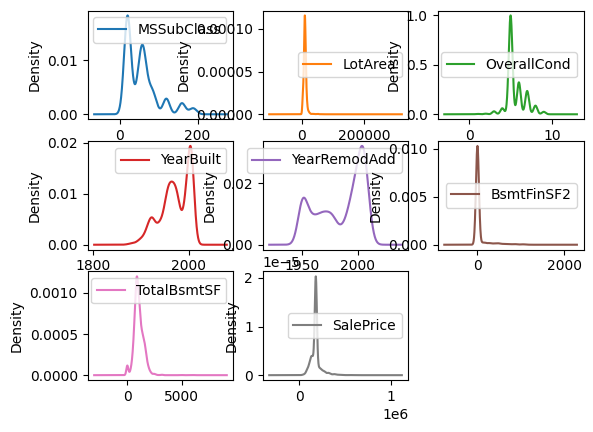

In [ ]:
new_data.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

### Correlation with Quality with respect to attributes

In [ ]:
new_data.corr()

<ipython-input-16-0de3741be453>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.corr()


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.202661,-0.066033,0.033428,0.042057,-0.072839,-0.222397,-0.059326
LotArea,-0.202661,1.000000,-0.025024,0.031226,0.027047,0.085927,0.262102,0.237990
OverallCond,-0.066033,-0.025024,1.000000,-0.375150,0.043586,0.040980,-0.180554,-0.055299
YearBuilt,0.033428,0.031226,-0.375150,1.000000,0.611755,-0.028329,0.407691,0.369442
YearRemodAdd,0.042057,0.027047,0.043586,0.611755,1.000000,-0.062818,0.294832,0.355167
BsmtFinSF2,-0.072839,0.085927,0.040980,-0.028329,-0.062818,1.000000,0.089027,-0.007672
TotalBsmtSF,-0.222397,0.262102,-0.180554,0.407691,0.294832,0.089027,1.000000,0.433343
SalePrice,-0.059326,0.237990,-0.055299,0.369442,0.355167,-0.007672,0.433343,1.000000


<ipython-input-17-0825d6a122fb>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.corrwith(new_data.SalePrice).plot.bar(figsize = (10, 5), title = "Correlation with Price", fontsize = 10,rot = 40, grid = True)


<Axes: title={'center': 'Correlation with Price'}>

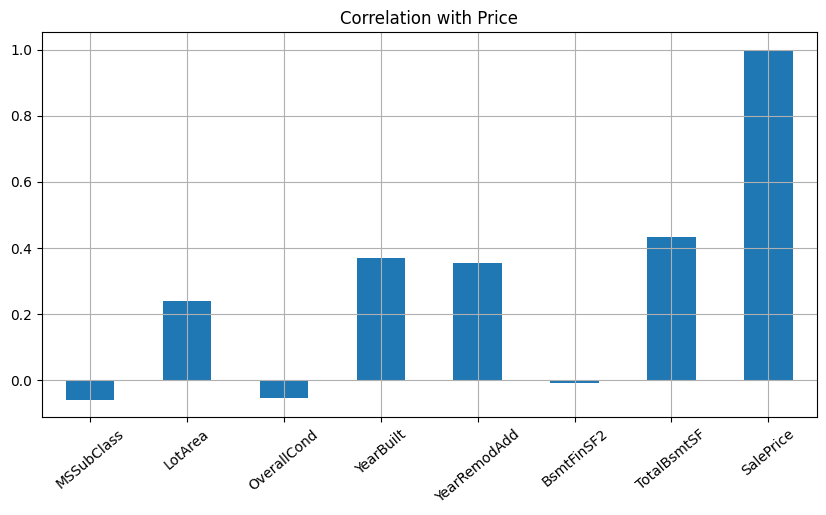

In [ ]:
new_data.corrwith(new_data.SalePrice).plot.bar(figsize = (10, 5), title = "Correlation with Price", fontsize = 10,rot = 40, grid = True)

### OneHotEncoding

In [ ]:
s = (new_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_data[object_cols]))
OH_cols.index = new_data.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Separating features and Spiting Data

In [ ]:
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

### Linear Regression

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print('Mean Absolute Error :',mean_absolute_percentage_error(Y_valid, Y_pred))

Mean Absolute Error : 0.18741683841599854


In [ ]:
score = r2_score(Y_valid,Y_pred)

print('R2 Score :', score)

R2 Score : 0.3741422704574463


### Conclusion - As we can see the model is giving accuracy as the Mean Absolute Error is 0.187 approx and the R2 score is 0.374 approx.

# **--------------------------------------------Thank You--------------------------------------------**